Finite Time of Integration (fti)
============================

Setup
-----------------------------

Let's first make sure we have the latest version of PHOEBE 2.4 installed (uncomment this line if running in an online notebook session such as colab).

In [1]:
#!pip install -I "phoebe>=2.4,<2.5"

As always, let's do imports and initialize a logger and a new bundle.

In [2]:
import phoebe
from phoebe import u # units
import numpy as np
import matplotlib.pyplot as plt

logger = phoebe.logger()

b = phoebe.default_binary()

In [3]:
b.add_dataset('lc', times=np.linspace(0,1,101), dataset='lc01')

<ParameterSet: 73 parameters | contexts: compute, constraint, dataset, figure>

Relevant Parameters
--------------------



An 'exptime' parameter exists for each lc dataset and is set to 0.0 by default.  This defines the exposure time that should be used when fti is enabled.  As stated in its description, the time stamp of each datapoint is defined to be the time of mid-exposure.  Note that the exptime applies to all times in the dataset - if times have different exposure-times, then they must be split into separate datasets manually.

In [4]:
print(b['exptime'])

Parameter: exptime@lc01@dataset
                       Qualifier: exptime
                     Description: Exposure time (time is defined as mid-exposure)
                           Value: 0.0 s
                  Constrained by: 
                      Constrains: None
                      Related to: None



Let's set the exposure time to 1 hr to make the convolution obvious in our 1-day default binary.

In [5]:
b['exptime'] = 1, 'hr'

An 'fti_method' parameter exists for each set of compute options and each lc dataset.  By default this is set to 'none' - meaning that the exposure times are ignored during [b.run_compute()](../api/phoebe.frontend.bundle.Bundle.run_compute.md).

In [6]:
print(b['fti_method'])

Parameter: fti_method@phoebe01@compute
                       Qualifier: fti_method
                     Description: How to handle finite-time integration (when non-zero exptime)
                           Value: none
                         Choices: none, oversample
                  Constrained by: 
                      Constrains: None
                      Related to: None



In [7]:
b['fti_method'] = 'oversample'

Once we set fti_method to be 'oversample', the corresponding 'fti_oversample' parameter(s) become visible.  This option defines how many different time-points PHOEBE should sample over the width of the exposure time and then average to return a single flux point.  By default this is set to 5.

Note that increasing this number will result in better accuracy of the convolution caused by the exposure time - but increases the computation time essentially linearly.  By setting to 5, our computation time will already be almost 5 times that when fti is disabled.

In [8]:
print(b['fti_oversample'])

Parameter: fti_oversample@phoebe01@compute
                       Qualifier: fti_oversample
                     Description: Number of times to sample per-datapoint for finite-time integration
                           Value: 5
                  Constrained by: 
                      Constrains: None
                      Related to: None
                 Only visible if: fti_method:oversample



Influence on Light Curves
-------------------------------

In [9]:
b.run_compute(fti_method='none', irrad_method='none', model='fti_off')

100%|██████████| 101/101 [00:01<00:00, 80.03it/s]


<ParameterSet: 3 parameters | qualifiers: comments, times, fluxes>

In [10]:
b.run_compute(fti_method='oversample', irrad_method='none', model='fit_on')

100%|██████████| 505/505 [00:05<00:00, 84.36it/s] 


<ParameterSet: 3 parameters | qualifiers: comments, times, fluxes>

The phase-smearing (convolution) caused by the exposure time is most evident in areas of the light curve with sharp derivatives, where the flux changes significantly over the course of the single exposure.  Here we can see that the 1-hr exposure time significantly changes the observed shapes of ingress and egress as well as the observed depth of the eclipse.

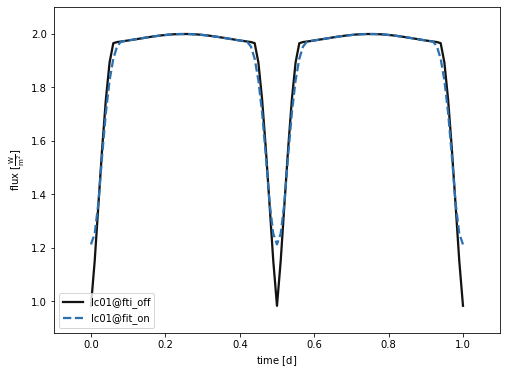

In [11]:
afig, mplfig = b.plot(show=True, legend=True)